## Data Loading and overview

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [4]:
df_train.isnull()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [5]:
df_test.isnull()

,id,keyword,location,text
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
3258,False,True,True,False
3259,False,True,True,False
3260,False,True,True,False
3261,False,True,True,False


In [6]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
df_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [8]:
df_train.isnull().sum().sum()

np.int64(2594)

In [9]:
df_test.isnull().sum().sum()

np.int64(1131)

In [10]:
df_train.drop(['id','keyword','location'], axis=1, inplace=True)

In [11]:
df_test.drop(['id','keyword','location'], axis=1, inplace=True)

In [12]:
df_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
df_test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [14]:
df_train.isnull().sum()

text      0
target    0
dtype: int64

In [15]:
df_test.isnull().sum()

text    0
dtype: int64

In [16]:
df_train.dtypes

text      object
target     int64
dtype: object

In [17]:
df_test.dtypes

text    object
dtype: object

## Data Preprocessing

In [18]:
df_train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [19]:
df_test['text']

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [20]:
# lowercasing

df_train['text'] = df_train['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()

(df_train['text'], df_test['text'])

(0       our deeds are the reason of this #earthquake m...
 1                  forest fire near la ronge sask. canada
 2       all residents asked to 'shelter in place' are ...
 3       13,000 people receive #wildfires evacuation or...
 4       just got sent this photo from ruby #alaska as ...
                               ...                        
 7608    two giant cranes holding a bridge collapse int...
 7609    @aria_ahrary @thetawniest the out of control w...
 7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
 7611    police investigating after an e-bike collided ...
 7612    the latest: more homes razed by northern calif...
 Name: text, Length: 7613, dtype: object,
 0                      just happened a terrible car crash
 1       heard about #earthquake is different cities, s...
 2       there is a forest fire at spot pond, geese are...
 3                apocalypse lighting. #spokane #wildfires
 4           typhoon soudelor kills 28 in china and taiwan
              

In [21]:
# remove html tags

import re

df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'<.*?>', '', x))
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'<.*?>', '', x))

(df_train['text'], df_test['text'])

(0       our deeds are the reason of this #earthquake m...
 1                  forest fire near la ronge sask. canada
 2       all residents asked to 'shelter in place' are ...
 3       13,000 people receive #wildfires evacuation or...
 4       just got sent this photo from ruby #alaska as ...
                               ...                        
 7608    two giant cranes holding a bridge collapse int...
 7609    @aria_ahrary @thetawniest the out of control w...
 7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
 7611    police investigating after an e-bike collided ...
 7612    the latest: more homes razed by northern calif...
 Name: text, Length: 7613, dtype: object,
 0                      just happened a terrible car crash
 1       heard about #earthquake is different cities, s...
 2       there is a forest fire at spot pond, geese are...
 3                apocalypse lighting. #spokane #wildfires
 4           typhoon soudelor kills 28 in china and taiwan
              

In [22]:
# remove URLs

import re

df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))

(df_train['text'], df_test['text'])

(0       our deeds are the reason of this #earthquake m...
 1                  forest fire near la ronge sask. canada
 2       all residents asked to 'shelter in place' are ...
 3       13,000 people receive #wildfires evacuation or...
 4       just got sent this photo from ruby #alaska as ...
                               ...                        
 7608    two giant cranes holding a bridge collapse int...
 7609    @aria_ahrary @thetawniest the out of control w...
 7610          m1.94 [01:04 utc]?5km s of volcano hawaii. 
 7611    police investigating after an e-bike collided ...
 7612    the latest: more homes razed by northern calif...
 Name: text, Length: 7613, dtype: object,
 0                      just happened a terrible car crash
 1       heard about #earthquake is different cities, s...
 2       there is a forest fire at spot pond, geese are...
 3                apocalypse lighting. #spokane #wildfires
 4           typhoon soudelor kills 28 in china and taiwan
              

In [23]:
# remove @mentions and '#' symbol

df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'@\w+', '', x))
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'@\w+', '', x))

df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'#', '', x))
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'#', '', x))

(df_train['text'], df_test['text'])


(0       our deeds are the reason of this earthquake ma...
 1                  forest fire near la ronge sask. canada
 2       all residents asked to 'shelter in place' are ...
 3       13,000 people receive wildfires evacuation ord...
 4       just got sent this photo from ruby alaska as s...
                               ...                        
 7608    two giant cranes holding a bridge collapse int...
 7609      the out of control wild fires in california ...
 7610          m1.94 [01:04 utc]?5km s of volcano hawaii. 
 7611    police investigating after an e-bike collided ...
 7612    the latest: more homes razed by northern calif...
 Name: text, Length: 7613, dtype: object,
 0                      just happened a terrible car crash
 1       heard about earthquake is different cities, st...
 2       there is a forest fire at spot pond, geese are...
 3                  apocalypse lighting. spokane wildfires
 4           typhoon soudelor kills 28 in china and taiwan
              

In [24]:
# remove punctuations and numbers

import string

df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

(df_train['text'], df_test['text'])

(0       our deeds are the reason of this earthquake ma...
 1                   forest fire near la ronge sask canada
 2       all residents asked to shelter in place are be...
 3        people receive wildfires evacuation orders in...
 4       just got sent this photo from ruby alaska as s...
                               ...                        
 7608    two giant cranes holding a bridge collapse int...
 7609      the out of control wild fires in california ...
 7610                        m  utckm s of volcano hawaii 
 7611    police investigating after an ebike collided w...
 7612    the latest more homes razed by northern califo...
 Name: text, Length: 7613, dtype: object,
 0                      just happened a terrible car crash
 1       heard about earthquake is different cities sta...
 2       there is a forest fire at spot pond geese are ...
 3                   apocalypse lighting spokane wildfires
 4             typhoon soudelor kills  in china and taiwan
              

In [25]:
# remove extra whitespaces

df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

(df_train['text'], df_test['text'])

(0       our deeds are the reason of this earthquake ma...
 1                   forest fire near la ronge sask canada
 2       all residents asked to shelter in place are be...
 3       people receive wildfires evacuation orders in ...
 4       just got sent this photo from ruby alaska as s...
                               ...                        
 7608    two giant cranes holding a bridge collapse int...
 7609    the out of control wild fires in california ev...
 7610                          m utckm s of volcano hawaii
 7611    police investigating after an ebike collided w...
 7612    the latest more homes razed by northern califo...
 Name: text, Length: 7613, dtype: object,
 0                      just happened a terrible car crash
 1       heard about earthquake is different cities sta...
 2       there is a forest fire at spot pond geese are ...
 3                   apocalypse lighting spokane wildfires
 4              typhoon soudelor kills in china and taiwan
              

In [26]:
# tokenization

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df_train['text'] = df_train['text'].apply(lambda x: word_tokenize(x))
df_test['text'] = df_test['text'].apply(lambda x: word_tokenize(x))

(df_train['text'], df_test['text'])

c:\Users\Sushant Shankar\.conda\envs\dsenv\Lib\site-packages\nltk\metrics\association.py:26: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.stats import fisher_exact
[nltk_data] Downloading package punkt to C:\Users\Sushant
[nltk_data]     Shankar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0       [our, deeds, are, the, reason, of, this, earth...
 1           [forest, fire, near, la, ronge, sask, canada]
 2       [all, residents, asked, to, shelter, in, place...
 3       [people, receive, wildfires, evacuation, order...
 4       [just, got, sent, this, photo, from, ruby, ala...
                               ...                        
 7608    [two, giant, cranes, holding, a, bridge, colla...
 7609    [the, out, of, control, wild, fires, in, calif...
 7610                   [m, utckm, s, of, volcano, hawaii]
 7611    [police, investigating, after, an, ebike, coll...
 7612    [the, latest, more, homes, razed, by, northern...
 Name: text, Length: 7613, dtype: object,
 0               [just, happened, a, terrible, car, crash]
 1       [heard, about, earthquake, is, different, citi...
 2       [there, is, a, forest, fire, at, spot, pond, g...
 3              [apocalypse, lighting, spokane, wildfires]
 4       [typhoon, soudelor, kills, in, china, and, tai...
              

In [27]:
# stopwords removal

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_train['text'] = df_train['text'].apply(lambda x: [word for word in x if word not in stop_words])
df_test['text'] = df_test['text'].apply(lambda x: [word for word in x if word not in stop_words])

(df_train['text'], df_test['text'])

[nltk_data] Downloading package stopwords to C:\Users\Sushant
[nltk_data]     Shankar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0       [deeds, reason, earthquake, may, allah, forgiv...
 1           [forest, fire, near, la, ronge, sask, canada]
 2       [residents, asked, shelter, place, notified, o...
 3       [people, receive, wildfires, evacuation, order...
 4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                               ...                        
 7608    [two, giant, cranes, holding, bridge, collapse...
 7609    [control, wild, fires, california, even, north...
 7610                             [utckm, volcano, hawaii]
 7611    [police, investigating, ebike, collided, car, ...
 7612    [latest, homes, razed, northern, california, w...
 Name: text, Length: 7613, dtype: object,
 0                        [happened, terrible, car, crash]
 1       [heard, earthquake, different, cities, stay, s...
 2       [forest, fire, spot, pond, geese, fleeing, acr...
 3              [apocalypse, lighting, spokane, wildfires]
 4               [typhoon, soudelor, kills, china, taiwan]
              

In [28]:
# lemmatization (normalize words like "running" → "run")

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df_train['text'] = df_train['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_test['text'] = df_test['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

(df_train['text'], df_test['text'])

[nltk_data] Downloading package wordnet to C:\Users\Sushant
[nltk_data]     Shankar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Sushant
[nltk_data]     Shankar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(0       [deed, reason, earthquake, may, allah, forgive...
 1           [forest, fire, near, la, ronge, sask, canada]
 2       [resident, asked, shelter, place, notified, of...
 3       [people, receive, wildfire, evacuation, order,...
 4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                               ...                        
 7608    [two, giant, crane, holding, bridge, collapse,...
 7609    [control, wild, fire, california, even, northe...
 7610                             [utckm, volcano, hawaii]
 7611    [police, investigating, ebike, collided, car, ...
 7612    [latest, home, razed, northern, california, wi...
 Name: text, Length: 7613, dtype: object,
 0                        [happened, terrible, car, crash]
 1       [heard, earthquake, different, city, stay, saf...
 2       [forest, fire, spot, pond, goose, fleeing, acr...
 3               [apocalypse, lighting, spokane, wildfire]
 4                [typhoon, soudelor, kill, china, taiwan]
              

In [29]:
# join back tokens into sentence

df_train['text'] = df_train['text'].apply(lambda x: ' '.join(x))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join(x))

(df_train['text'], df_test['text'])

(0              deed reason earthquake may allah forgive u
 1                   forest fire near la ronge sask canada
 2       resident asked shelter place notified officer ...
 3       people receive wildfire evacuation order calif...
 4       got sent photo ruby alaska smoke wildfire pour...
                               ...                        
 7608    two giant crane holding bridge collapse nearby...
 7609    control wild fire california even northern par...
 7610                                 utckm volcano hawaii
 7611    police investigating ebike collided car little...
 7612    latest home razed northern california wildfire...
 Name: text, Length: 7613, dtype: object,
 0                             happened terrible car crash
 1       heard earthquake different city stay safe ever...
 2       forest fire spot pond goose fleeing across str...
 3                    apocalypse lighting spokane wildfire
 4                      typhoon soudelor kill china taiwan
              

## Feature Extraction

In [30]:
# using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# initialize tf-idf vectorizer

tfidf = TfidfVectorizer(
    max_features=5000,   # keep top 5000 words
    ngram_range=(1,2),   # unigrams + bigrams
    stop_words='english' # extra stopword removal
)

In [32]:
# Fit only on training data and transform
X_train = tfidf.fit_transform(df_train['text'])

# Target labels
y_train = df_train['target']

In [33]:
# Transform test data using same vocabulary
X_test = tfidf.transform(df_test['text'])

In [34]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (7613, 5000)
Test shape: (3263, 5000)


## Model Building

In [35]:
# ---------------- Logistic Regression ----------------
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit on training data
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test)

# Predict probabilities
y_proba_log = log_reg.predict_proba(X_test)

# Show predictions
print("✅ Logistic Regression model trained!")
print("First 20 Predictions (Logistic Regression):")
print(y_pred_log[:20])
print(y_proba_log)

✅ Logistic Regression model trained!
First 20 Predictions (Logistic Regression):
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
[[0.234328   0.765672  ]
 [0.35799271 0.64200729]
 [0.32722528 0.67277472]
 ...
 [0.25576822 0.74423178]
 [0.31336189 0.68663811]
 [0.41144018 0.58855982]]


In [36]:
# ---------------- Naive Bayes ----------------
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
nb = GaussianNB()

# Convert sparse matrices to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Fit on training data
nb.fit(X_train_dense, y_train)

# Predict on test data
y_pred_nb = nb.predict(X_test_dense)

# Predict probabilities
y_proba_nb = nb.predict_proba(X_test_dense)

# Show predictions
print("✅ Naive Bayes model trained!")
print("First 20 Predictions (Naive Bayes):")
print(y_pred_nb[:20])
print(y_proba_nb)

✅ Naive Bayes model trained!
First 20 Predictions (Naive Bayes):
[0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [37]:
# ---------------- Logistic Regression Validation ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split train data into train + validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit on training subset
log_reg.fit(X_tr, y_tr)

# Predict on validation set
y_val_pred_lr = log_reg.predict(X_val)

# Evaluate
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("Classification Report:\n", classification_report(y_val, y_val_pred_lr))


Validation Accuracy: 0.7931713722915299
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       874
           1       0.81      0.67      0.74       649

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



In [38]:
# ---------------- Naive Bayes Validation ----------------

from sklearn.model_selection import train_test_split

# Split train data into train + validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit model
nb = GaussianNB()
nb.fit(X_tr.toarray(), y_tr)

# Predict on validation set
y_val_pred_nb = nb.predict(X_val.toarray())

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_nb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_nb))


Validation Accuracy: 0.7544320420223244
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       874
           1       0.77      0.61      0.68       649

    accuracy                           0.75      1523
   macro avg       0.76      0.74      0.74      1523
weighted avg       0.76      0.75      0.75      1523



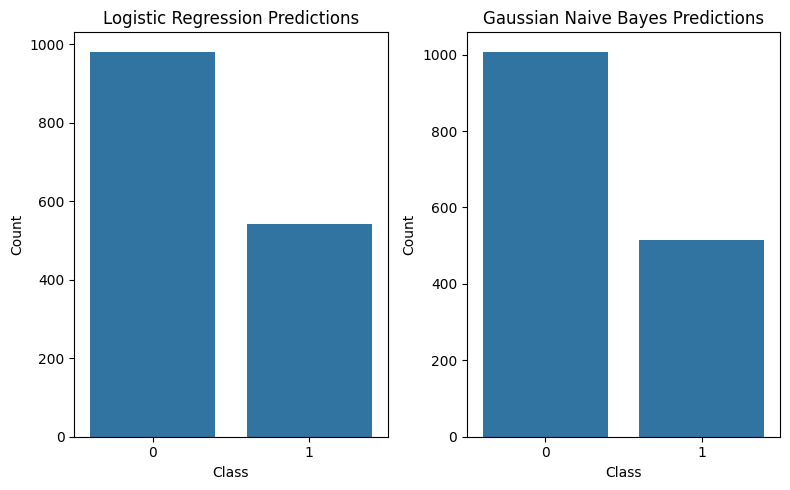

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Histogram of Logistic Regression predictions
plt.subplot(1,2,1)
sns.countplot(x=y_val_pred_lr)
plt.title("Logistic Regression Predictions")
plt.xlabel("Class")
plt.ylabel("Count")

# Histogram of Naive Bayes predictions
plt.subplot(1,2,2)
sns.countplot(x=y_val_pred_nb)
plt.title("Gaussian Naive Bayes Predictions")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [40]:
# accuracy

from sklearn.metrics import accuracy_score

# Compute accuracy
acc_lr = accuracy_score(y_val, y_val_pred_lr)
acc_nb = accuracy_score(y_val, y_val_pred_nb)

# Print accuracies
print("Logistic Regression Validation Accuracy:", acc_lr)
print("Naive Bayes Validation Accuracy:", acc_nb)

Logistic Regression Validation Accuracy: 0.7931713722915299
Naive Bayes Validation Accuracy: 0.7544320420223244


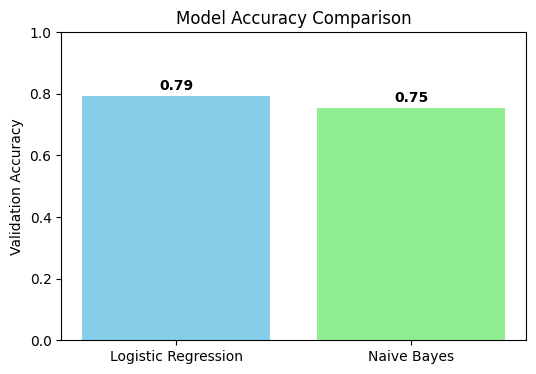

In [41]:
# Models and their accuracies
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [acc_lr, acc_nb]

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.ylabel('Validation Accuracy')
plt.title('Model Accuracy Comparison')

# Annotate accuracy values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()